# Football player Dataset Cleaning and Preparing

This dataset has been downloaded from  Kaggle https://www.kaggle.com/karangadiya/fifa19. License: [CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/)

In [ ]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, minmax_scale, scale

import matplotlib.pyplot as plt
import seaborn as sns
import bokeh as bk

Mounted at /gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
INPUT_FILE_NAME = "/content/drive/MyDrive/Deep_Learning-UPM/Práctica-1/FootballPlayerRawDataset.csv"
ATT_FILE_NAME = "/content/drive/MyDrive/Deep_Learning-UPM/Práctica-1/FootballPlayerPreparedCleanAttributes.csv"
ONE_HOT_ENCODED_CLASSES_FILE_NAME = "/content/drive/MyDrive/Deep_Learning-UPM/Práctica-1/FootballPlayerOneHotEncodedClasses.csv"

In [ ]:
INPUT_FILE_NAME = "/gdrive/My Drive/Colab Notebooks/datasets/Fifa/FootballPlayerRawDataset.csv"
ATT_FILE_NAME = "/gdrive/My Drive/Colab Notebooks/datasets/Fifa/FootballPlayerPreparedCleanAttributes.csv"
ONE_HOT_ENCODED_CLASSES_FILE_NAME = "/gdrive/My Drive/Colab Notebooks/datasets/Fifa/FootballPlayerOneHotEncodedClasses.csv"

In [ ]:
dataset = pd.read_csv(INPUT_FILE_NAME, sep=",")

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

**First step:** Remove unnecesary columns

In [ ]:
dataset.drop(dataset.loc[:, 'Unnamed: 0':'Flag'].columns, inplace=True, axis = 1)
dataset.drop(dataset.loc[:, 'Potential':'Real Face'].columns, inplace=True, axis = 1)
dataset.drop(dataset.loc[:, 'Jersey Number':'RB'].columns, inplace=True, axis = 1)
dataset.drop(dataset.loc[:, 'GKDiving':'Release Clause'].columns, inplace=True, axis = 1)

Then, we remove the goal keepers.

In [ ]:
dataset.drop(dataset[dataset.Position=='GK'].index, inplace=True)

In [ ]:
dataset[:10]

,Overall,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,94,RF,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0
1,94,ST,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0
2,92,LW,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0
4,91,RCM,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0
5,91,LF,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0
6,91,RCM,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,88.0,93.0,80.0,72.0,93.0,90.0,94.0,79.0,68.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0
7,91,RS,77.0,93.0,77.0,82.0,88.0,87.0,86.0,84.0,64.0,90.0,86.0,75.0,82.0,92.0,83.0,86.0,69.0,90.0,83.0,85.0,87.0,41.0,92.0,84.0,85.0,85.0,62.0,45.0,38.0
8,91,RCB,66.0,60.0,91.0,78.0,66.0,63.0,74.0,72.0,77.0,84.0,76.0,75.0,78.0,85.0,66.0,79.0,93.0,84.0,83.0,59.0,88.0,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0
10,90,ST,62.0,91.0,85.0,83.0,89.0,85.0,77.0,86.0,65.0,89.0,77.0,78.0,78.0,90.0,78.0,88.0,84.0,78.0,84.0,84.0,80.0,39.0,91.0,77.0,88.0,86.0,34.0,42.0,19.0
11,90,LCM,88.0,76.0,54.0,92.0,82.0,81.0,86.0,84.0,93.0,90.0,64.0,62.0,70.0,89.0,71.0,87.0,30.0,75.0,73.0,92.0,60.0,82.0,79.0,86.0,73.0,85.0,72.0,79.0,69.0


In [ ]:
dataset[-10:]

,Overall,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
18196,47,CM,31.0,28.0,40.0,53.0,31.0,46.0,39.0,37.0,48.0,48.0,58.0,58.0,60.0,48.0,79.0,42.0,63.0,35.0,51.0,30.0,55.0,44.0,28.0,51.0,44.0,35.0,41.0,44.0,54.0
18197,47,CM,44.0,44.0,36.0,53.0,43.0,50.0,48.0,46.0,52.0,51.0,68.0,62.0,58.0,41.0,62.0,50.0,55.0,50.0,38.0,37.0,37.0,28.0,39.0,48.0,49.0,52.0,41.0,47.0,38.0
18199,47,CM,31.0,31.0,41.0,51.0,26.0,46.0,35.0,31.0,55.0,47.0,60.0,63.0,53.0,46.0,55.0,49.0,57.0,42.0,43.0,30.0,53.0,49.0,35.0,40.0,36.0,40.0,48.0,49.0,49.0
18200,47,ST,28.0,47.0,47.0,42.0,37.0,39.0,32.0,25.0,30.0,41.0,65.0,48.0,64.0,54.0,80.0,44.0,77.0,31.0,31.0,51.0,26.0,16.0,46.0,37.0,58.0,50.0,15.0,17.0,14.0
18201,47,RB,22.0,23.0,45.0,25.0,27.0,21.0,21.0,27.0,27.0,32.0,52.0,52.0,39.0,43.0,48.0,39.0,74.0,39.0,52.0,16.0,44.0,45.0,20.0,31.0,38.0,43.0,44.0,47.0,53.0
18202,47,CM,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0
18203,47,ST,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0
18204,47,ST,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0
18205,47,RW,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,60.0,52.0,21.0,71.0,64.0,42.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0
18206,46,CM,41.0,34.0,46.0,48.0,30.0,43.0,40.0,34.0,44.0,51.0,57.0,55.0,55.0,51.0,63.0,43.0,62.0,47.0,60.0,32.0,56.0,42.0,34.0,49.0,33.0,43.0,40.0,43.0,50.0


**Second Step:** find out whether or not there are missing values and remove the least influential attributes. 

In [ ]:
{att : dataset[dataset[att].isnull()].shape[0] for att in dataset.columns}

{'Acceleration': 48,
 'Aggression': 48,
 'Agility': 48,
 'Balance': 48,
 'BallControl': 48,
 'Composure': 48,
 'Crossing': 48,
 'Curve': 48,
 'Dribbling': 48,
 'FKAccuracy': 48,
 'Finishing': 48,
 'HeadingAccuracy': 48,
 'Interceptions': 48,
 'Jumping': 48,
 'LongPassing': 48,
 'LongShots': 48,
 'Marking': 48,
 'Overall': 0,
 'Penalties': 48,
 'Position': 60,
 'Positioning': 48,
 'Reactions': 48,
 'ShortPassing': 48,
 'ShotPower': 48,
 'SlidingTackle': 48,
 'SprintSpeed': 48,
 'Stamina': 48,
 'StandingTackle': 48,
 'Strength': 48,
 'Vision': 48,
 'Volleys': 48}

Since we have enough data, we remove all rows with missing values in any attribute

In [ ]:
dataset.dropna (inplace=True)
{att : dataset[dataset[att].isnull()].shape[0] for att in dataset.columns}

{'Acceleration': 0,
 'Aggression': 0,
 'Agility': 0,
 'Balance': 0,
 'BallControl': 0,
 'Composure': 0,
 'Crossing': 0,
 'Curve': 0,
 'Dribbling': 0,
 'FKAccuracy': 0,
 'Finishing': 0,
 'HeadingAccuracy': 0,
 'Interceptions': 0,
 'Jumping': 0,
 'LongPassing': 0,
 'LongShots': 0,
 'Marking': 0,
 'Overall': 0,
 'Penalties': 0,
 'Position': 0,
 'Positioning': 0,
 'Reactions': 0,
 'ShortPassing': 0,
 'ShotPower': 0,
 'SlidingTackle': 0,
 'SprintSpeed': 0,
 'Stamina': 0,
 'StandingTackle': 0,
 'Strength': 0,
 'Vision': 0,
 'Volleys': 0}

In [ ]:
dataset.shape

(16122, 31)

The **correlation matrix** permits to visualize dependencies between pairs of attributes: values close to -1 or +1 indicate a high correlation. A negative correlation value means than when the value of an attribute gets high, the value of the other attribute decreases, and vice-versa. Positive correlation values point out that both features increase or decrease simultaneously. 

In [ ]:
dataset.corr()

,Overall,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
Overall,1.000000,0.496603,0.373079,0.466908,0.722720,0.452090,0.516363,0.503054,0.455875,0.585104,0.717933,0.150825,0.170155,0.244344,0.847739,0.059425,0.562960,0.228271,0.461417,0.341067,0.502109,0.452916,0.333275,0.438692,0.524361,0.391124,0.801749,0.305698,0.264082,0.224365
Crossing,0.496603,1.000000,0.413404,-0.134959,0.632386,0.472485,0.712261,0.714762,0.618580,0.592781,0.682796,0.439799,0.393403,0.547590,0.461861,0.435751,0.457531,-0.027529,0.351862,-0.177255,0.548462,0.105539,0.125985,0.585624,0.643948,0.371606,0.469666,0.086971,0.085429,0.078963
Finishing,0.373079,0.413404,1.000000,0.002099,0.398895,0.814663,0.706635,0.614189,0.537508,0.218965,0.645849,0.373630,0.349087,0.480792,0.349146,0.311487,0.703408,-0.057519,0.119415,-0.125550,0.803036,-0.201407,-0.491733,0.818964,0.655283,0.744835,0.412177,-0.503042,-0.558565,-0.585841
HeadingAccuracy,0.466908,-0.134959,0.002099,1.000000,0.131909,0.062357,-0.134535,-0.091652,-0.076517,0.057267,0.069890,-0.335712,-0.238734,-0.351398,0.405671,-0.467826,0.189628,0.357951,0.161594,0.641662,0.029784,0.458631,0.286880,-0.024105,-0.079291,0.108405,0.344770,0.274280,0.257420,0.234933
ShortPassing,0.722720,0.632386,0.398895,0.131909,1.000000,0.469096,0.638983,0.614810,0.584412,0.842294,0.800317,0.171664,0.140618,0.361314,0.658269,0.252552,0.556794,0.026758,0.375038,0.041784,0.575126,0.305331,0.287053,0.501792,0.724511,0.384587,0.673243,0.244696,0.235083,0.203009
Volleys,0.452090,0.472485,0.814663,0.062357,0.469096,1.000000,0.674461,0.691624,0.618031,0.313951,0.657246,0.311606,0.282198,0.447630,0.433796,0.294044,0.732058,-0.019984,0.146353,-0.074828,0.786780,-0.064275,-0.334536,0.745740,0.659091,0.730061,0.504112,-0.357150,-0.402222,-0.430056
Dribbling,0.516363,0.712261,0.706635,-0.134535,0.638983,0.674461,1.000000,0.731726,0.599424,0.494533,0.851001,0.552978,0.500952,0.662569,0.475958,0.495734,0.612245,-0.059451,0.276842,-0.237797,0.724191,-0.059600,-0.190316,0.788939,0.758829,0.565716,0.509143,-0.214481,-0.244737,-0.258046
Curve,0.503054,0.714762,0.614189,-0.091652,0.614810,0.691624,0.731726,1.000000,0.788928,0.539851,0.721956,0.367913,0.313834,0.537080,0.472869,0.406304,0.651075,-0.042657,0.252775,-0.164300,0.730734,0.035402,-0.068820,0.673975,0.727416,0.593532,0.540471,-0.108242,-0.128246,-0.147523
FKAccuracy,0.455875,0.618580,0.537508,-0.076517,0.584412,0.618031,0.599424,0.788928,1.000000,0.554455,0.625404,0.223660,0.166871,0.413473,0.437640,0.328549,0.615019,-0.064568,0.211489,-0.126326,0.695764,0.075132,0.001575,0.562075,0.683214,0.589946,0.498877,-0.048092,-0.056328,-0.081250
LongPassing,0.585104,0.592781,0.218965,0.057267,0.842294,0.313951,0.494533,0.539851,0.554455,1.000000,0.633354,0.075184,0.043049,0.272754,0.534187,0.210938,0.443055,0.002908,0.344969,0.034387,0.461247,0.348801,0.425595,0.325664,0.651983,0.238135,0.577808,0.369965,0.384637,0.360727


In [ ]:
dataset[:10]

,Overall,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,94,RF,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0
1,94,ST,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0
2,92,LW,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0
4,91,RCM,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0
5,91,LF,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0
6,91,RCM,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,88.0,93.0,80.0,72.0,93.0,90.0,94.0,79.0,68.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0
7,91,RS,77.0,93.0,77.0,82.0,88.0,87.0,86.0,84.0,64.0,90.0,86.0,75.0,82.0,92.0,83.0,86.0,69.0,90.0,83.0,85.0,87.0,41.0,92.0,84.0,85.0,85.0,62.0,45.0,38.0
8,91,RCB,66.0,60.0,91.0,78.0,66.0,63.0,74.0,72.0,77.0,84.0,76.0,75.0,78.0,85.0,66.0,79.0,93.0,84.0,83.0,59.0,88.0,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0
10,90,ST,62.0,91.0,85.0,83.0,89.0,85.0,77.0,86.0,65.0,89.0,77.0,78.0,78.0,90.0,78.0,88.0,84.0,78.0,84.0,84.0,80.0,39.0,91.0,77.0,88.0,86.0,34.0,42.0,19.0
11,90,LCM,88.0,76.0,54.0,92.0,82.0,81.0,86.0,84.0,93.0,90.0,64.0,62.0,70.0,89.0,71.0,87.0,30.0,75.0,73.0,92.0,60.0,82.0,79.0,86.0,73.0,85.0,72.0,79.0,69.0


We remove "Position" and those attributes with a correlation value less than 0.4, assuming that they do not excessively influence the overall value. 

In [ ]:
dataset.drop(['Position'], inplace=True, axis = 1)
dataset.drop(['Finishing'], inplace=True, axis = 1)
dataset.drop(dataset.loc[:, 'Acceleration':'Agility'].columns, inplace=True, axis = 1)
dataset.drop(['Balance'], inplace=True, axis = 1)
dataset.drop(['Jumping'], inplace=True, axis = 1)
dataset.drop(['Strength'], inplace=True, axis = 1)
dataset.drop(['Interceptions'], inplace=True, axis = 1)
dataset.drop(['Penalties'], inplace=True, axis = 1)
dataset.drop(dataset.loc[:, 'Marking':'SlidingTackle'].columns, inplace=True, axis = 1)

In [ ]:
dataset.shape

(16122, 18)

**Third Step:** shuffle the dataset (three times).

In [ ]:
dataset=dataset.sample(frac=1) #frac is the fraction of axis items to return. 1 means all of them
dataset=dataset.sample(frac=1)
dataset=dataset.sample(frac=1).reset_index(drop=True) #Reset index and drop the old one
dataset.head()

,Overall,Crossing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Reactions,ShotPower,Stamina,LongShots,Aggression,Positioning,Vision,Composure
0,64,63.0,60.0,57.0,62.0,63.0,43.0,41.0,53.0,62.0,53.0,62.0,52.0,55.0,59.0,61.0,57.0,62.0
1,61,52.0,35.0,63.0,38.0,63.0,43.0,35.0,53.0,63.0,56.0,68.0,52.0,60.0,38.0,53.0,58.0,59.0
2,59,50.0,44.0,55.0,31.0,53.0,37.0,43.0,54.0,56.0,62.0,45.0,72.0,33.0,56.0,49.0,62.0,59.0
3,64,54.0,38.0,56.0,32.0,62.0,44.0,31.0,53.0,58.0,58.0,59.0,78.0,49.0,49.0,46.0,54.0,48.0
4,59,55.0,57.0,53.0,49.0,57.0,66.0,65.0,32.0,59.0,56.0,69.0,63.0,62.0,34.0,58.0,55.0,44.0


**Fourth step:** The problem consists on classifying football players depending on their overall score (quality) into four categories: Poor, Intermediate, Good, and Excellent. We use a quatile-based discretization function to perform this task.  

In [ ]:
labels = pd.qcut(dataset["Overall"],4,labels=False)

In [ ]:
dataset.insert (1,"Quality",labels)
dataset[:10]

,Overall,Quality,Crossing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Reactions,ShotPower,Stamina,LongShots,Aggression,Positioning,Vision,Composure
0,64,1,63.0,60.0,57.0,62.0,63.0,43.0,41.0,53.0,62.0,53.0,62.0,52.0,55.0,59.0,61.0,57.0,62.0
1,61,0,52.0,35.0,63.0,38.0,63.0,43.0,35.0,53.0,63.0,56.0,68.0,52.0,60.0,38.0,53.0,58.0,59.0
2,59,0,50.0,44.0,55.0,31.0,53.0,37.0,43.0,54.0,56.0,62.0,45.0,72.0,33.0,56.0,49.0,62.0,59.0
3,64,1,54.0,38.0,56.0,32.0,62.0,44.0,31.0,53.0,58.0,58.0,59.0,78.0,49.0,49.0,46.0,54.0,48.0
4,59,0,55.0,57.0,53.0,49.0,57.0,66.0,65.0,32.0,59.0,56.0,69.0,63.0,62.0,34.0,58.0,55.0,44.0
5,66,1,65.0,55.0,66.0,61.0,68.0,48.0,49.0,60.0,66.0,51.0,64.0,70.0,61.0,45.0,61.0,54.0,57.0
6,64,1,60.0,43.0,59.0,50.0,66.0,42.0,25.0,54.0,58.0,53.0,62.0,70.0,55.0,43.0,57.0,59.0,64.0
7,66,1,63.0,37.0,65.0,46.0,69.0,66.0,63.0,62.0,67.0,61.0,59.0,77.0,53.0,66.0,50.0,57.0,69.0
8,87,3,87.0,70.0,84.0,60.0,80.0,80.0,63.0,74.0,84.0,83.0,64.0,91.0,66.0,75.0,79.0,70.0,79.0
9,51,0,36.0,48.0,60.0,28.0,50.0,39.0,34.0,55.0,46.0,53.0,50.0,45.0,28.0,52.0,31.0,39.0,45.0


Calculating the *Overall* intervals for each label.

In [ ]:
intervals={label : [(dataset.loc[dataset["Quality"]==label].min()["Overall"]),
                    (dataset.loc[dataset["Quality"]==label].max()["Overall"])]
                    for label in range(4)}
intervals

{0: [46.0, 62.0], 1: [63.0, 66.0], 2: [67.0, 71.0], 3: [72.0, 94.0]}

The number of instances per label should be balanced.

In [ ]:
dataset["Quality"].value_counts()

2    4353
0    4296
1    3868
3    3605
Name: Quality, dtype: int64

In [ ]:
interval_names = [str(interval) for interval in intervals.values()]
interval_names[0]="Poor:"+interval_names[0]
interval_names[1]="Interm:"+interval_names[1]
interval_names[2]="Good:"+interval_names[2]
interval_names[3]="Excel:"+interval_names[3]
interval_names

['Poor:[46.0, 62.0]',
 'Interm:[63.0, 66.0]',
 'Good:[67.0, 71.0]',
 'Excel:[72.0, 94.0]']

In [ ]:
dataset.drop(columns="Overall", inplace=True)
dataset[:10]

,Quality,Crossing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Reactions,ShotPower,Stamina,LongShots,Aggression,Positioning,Vision,Composure
0,1,63.0,60.0,57.0,62.0,63.0,43.0,41.0,53.0,62.0,53.0,62.0,52.0,55.0,59.0,61.0,57.0,62.0
1,0,52.0,35.0,63.0,38.0,63.0,43.0,35.0,53.0,63.0,56.0,68.0,52.0,60.0,38.0,53.0,58.0,59.0
2,0,50.0,44.0,55.0,31.0,53.0,37.0,43.0,54.0,56.0,62.0,45.0,72.0,33.0,56.0,49.0,62.0,59.0
3,1,54.0,38.0,56.0,32.0,62.0,44.0,31.0,53.0,58.0,58.0,59.0,78.0,49.0,49.0,46.0,54.0,48.0
4,0,55.0,57.0,53.0,49.0,57.0,66.0,65.0,32.0,59.0,56.0,69.0,63.0,62.0,34.0,58.0,55.0,44.0
5,1,65.0,55.0,66.0,61.0,68.0,48.0,49.0,60.0,66.0,51.0,64.0,70.0,61.0,45.0,61.0,54.0,57.0
6,1,60.0,43.0,59.0,50.0,66.0,42.0,25.0,54.0,58.0,53.0,62.0,70.0,55.0,43.0,57.0,59.0,64.0
7,1,63.0,37.0,65.0,46.0,69.0,66.0,63.0,62.0,67.0,61.0,59.0,77.0,53.0,66.0,50.0,57.0,69.0
8,3,87.0,70.0,84.0,60.0,80.0,80.0,63.0,74.0,84.0,83.0,64.0,91.0,66.0,75.0,79.0,70.0,79.0
9,0,36.0,48.0,60.0,28.0,50.0,39.0,34.0,55.0,46.0,53.0,50.0,45.0,28.0,52.0,31.0,39.0,45.0


**Fifth Step:** split the dataset vertically into attributes $x$ and label $t$ for supervised learning.

In [ ]:
discretized_t = pd.DataFrame(data=dataset["Quality"].values,columns=["Quality"])
discretized_t[:10]

,Quality
0,1
1,0
2,0
3,1
4,0
5,1
6,1
7,1
8,3
9,0


In [ ]:
x = dataset.drop (columns="Quality")
x.head()

,Crossing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Reactions,ShotPower,Stamina,LongShots,Aggression,Positioning,Vision,Composure
0,63.0,60.0,57.0,62.0,63.0,43.0,41.0,53.0,62.0,53.0,62.0,52.0,55.0,59.0,61.0,57.0,62.0
1,52.0,35.0,63.0,38.0,63.0,43.0,35.0,53.0,63.0,56.0,68.0,52.0,60.0,38.0,53.0,58.0,59.0
2,50.0,44.0,55.0,31.0,53.0,37.0,43.0,54.0,56.0,62.0,45.0,72.0,33.0,56.0,49.0,62.0,59.0
3,54.0,38.0,56.0,32.0,62.0,44.0,31.0,53.0,58.0,58.0,59.0,78.0,49.0,49.0,46.0,54.0,48.0
4,55.0,57.0,53.0,49.0,57.0,66.0,65.0,32.0,59.0,56.0,69.0,63.0,62.0,34.0,58.0,55.0,44.0


**Sixth Step:** one-hot encoding of labels (target values).

In [ ]:
encoder = OneHotEncoder(categories="auto") # Function that one-hot encoders integers
one_hot_t = encoder.fit_transform(discretized_t.values.reshape(-1,1)).toarray()
one_hot_t[:10]

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]])

In [ ]:
one_hot_t = pd.DataFrame(data=one_hot_t,columns=interval_names)
one_hot_t[:10]

,"Poor:[46.0, 62.0]","Interm:[63.0, 66.0]","Good:[67.0, 71.0]","Excel:[72.0, 94.0]"
0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0
6,0.0,1.0,0.0,0.0
7,0.0,1.0,0.0,0.0
8,0.0,0.0,0.0,1.0
9,1.0,0.0,0.0,0.0


**Seventh Step:** Standardization or Normalization of the input dataset. *Standardization* is much less affected by outliers, but it does not bound values to a specific range, which may be a problem for neural networks. The center is the mean, and the data is scaled to unit variance. On the other hand, *max-min scaling* ranges the data within max and min values, usually -1, and 1 or \[0,1\].  

In [ ]:
x = pd.DataFrame (minmax_scale (x, feature_range=(-1,1)),columns=x.columns)
#x = pd.DataFrame (scale (x),columns=x.columns)
x[:10]

,Crossing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Reactions,ShotPower,Stamina,LongShots,Aggression,Positioning,Vision,Composure
0,0.268293,0.139241,0.013699,0.300,0.180723,-0.228916,-0.261905,-0.081081,0.042254,-0.146667,0.185185,-0.275362,0.060241,0.121951,0.190476,0.097561,0.081081
1,0.000000,-0.493671,0.178082,-0.300,0.180723,-0.228916,-0.404762,-0.081081,0.070423,-0.066667,0.333333,-0.275362,0.180723,-0.390244,0.000000,0.121951,0.000000
2,-0.048780,-0.265823,-0.041096,-0.475,-0.060241,-0.373494,-0.214286,-0.054054,-0.126761,0.093333,-0.234568,0.304348,-0.469880,0.048780,-0.095238,0.219512,0.000000
3,0.048780,-0.417722,-0.013699,-0.450,0.156627,-0.204819,-0.500000,-0.081081,-0.070423,-0.013333,0.111111,0.478261,-0.084337,-0.121951,-0.166667,0.024390,-0.297297
4,0.073171,0.063291,-0.095890,-0.025,0.036145,0.325301,0.309524,-0.648649,-0.042254,-0.066667,0.358025,0.043478,0.228916,-0.487805,0.119048,0.048780,-0.405405
5,0.317073,0.012658,0.260274,0.275,0.301205,-0.108434,-0.071429,0.108108,0.154930,-0.200000,0.234568,0.246377,0.204819,-0.219512,0.190476,0.024390,-0.054054
6,0.195122,-0.291139,0.068493,0.000,0.253012,-0.253012,-0.642857,-0.054054,-0.070423,-0.146667,0.185185,0.246377,0.060241,-0.268293,0.095238,0.146341,0.135135
7,0.268293,-0.443038,0.232877,-0.100,0.325301,0.325301,0.261905,0.162162,0.183099,0.066667,0.111111,0.449275,0.012048,0.292683,-0.071429,0.097561,0.270270
8,0.853659,0.392405,0.753425,0.250,0.590361,0.662651,0.261905,0.486486,0.661972,0.653333,0.234568,0.855072,0.325301,0.512195,0.619048,0.414634,0.540541
9,-0.390244,-0.164557,0.095890,-0.550,-0.132530,-0.325301,-0.428571,-0.027027,-0.408451,-0.146667,-0.111111,-0.478261,-0.590361,-0.048780,-0.523810,-0.341463,-0.378378


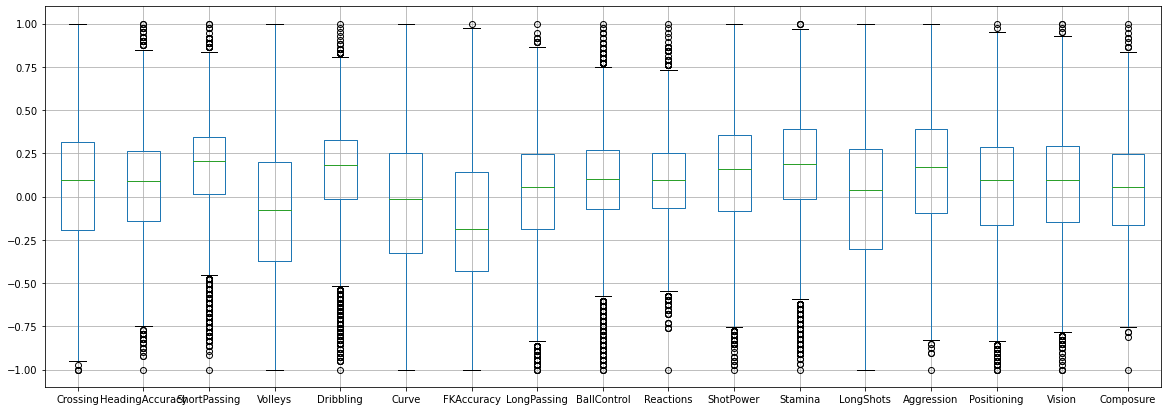

In [ ]:
x.boxplot(figsize=(20,7))

An example of representing just one attribute

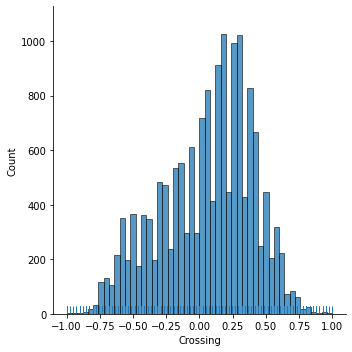

In [ ]:
sns.displot(x["Crossing"],kde=False,rug=True)

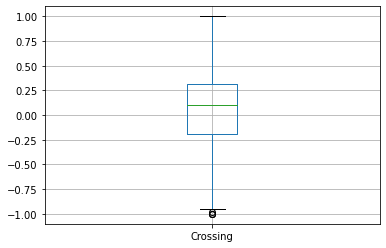

In [ ]:
x.boxplot(column=["Crossing"])

In [ ]:
x.describe()

,Crossing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Reactions,ShotPower,Stamina,LongShots,Aggression,Positioning,Vision,Composure
count,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000
mean,0.053537,0.064942,0.168294,-0.081373,0.122654,-0.030012,-0.132537,0.002751,0.076091,0.098800,0.125965,0.169170,-0.025506,0.136145,0.043417,0.060219,0.036497
std,0.344606,0.293820,0.268085,0.369549,0.301492,0.364944,0.358826,0.334822,0.282066,0.233806,0.326638,0.324097,0.379027,0.352347,0.349409,0.314939,0.274291
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.195122,-0.139241,0.013699,-0.375000,-0.012048,-0.325301,-0.428571,-0.189189,-0.070423,-0.066667,-0.086420,-0.014493,-0.301205,-0.097561,-0.166667,-0.146341,-0.162162
50%,0.097561,0.088608,0.205479,-0.075000,0.180723,-0.012048,-0.190476,0.054054,0.098592,0.093333,0.160494,0.188406,0.036145,0.170732,0.095238,0.097561,0.054054
75%,0.317073,0.265823,0.342466,0.200000,0.325301,0.253012,0.142857,0.243243,0.267606,0.253333,0.358025,0.391304,0.277108,0.390244,0.285714,0.292683,0.243243
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Saving** attributes matrix *x* and target labels *t*  to csv files.

In [ ]:
x.to_csv (ATT_FILE_NAME, index=False)
one_hot_t.to_csv(ONE_HOT_ENCODED_CLASSES_FILE_NAME, index=False)